In [1]:
from Phonemes import Phonemes
from utils import seed_everything

seed_everything()
P = Phonemes()

Using MPS device
Training model with hyperparameters:
Epochs:    10
Hidden:    4
Layers:    1
Dropout:   0.0
Learning:  0.001
Epoch 1
Train loss: 2.497
Epoch 1: Train: 2.497 Valid: 3.328 Time: 420.94s
Epoch 2
Train loss: 2.239
Epoch 2: Train: 2.239 Valid: 3.304 Time: 419.55s
Epoch 3
Train loss: 2.165
Epoch 3: Train: 2.165 Valid: 3.278 Time: 417.83s
Epoch 4
Train loss: 2.125
Epoch 4: Train: 2.125 Valid: 3.281 Time: 419.31s
Epoch 5
Train loss: 2.101
Epoch 5: Train: 2.101 Valid: 3.214 Time: 416.96s
Epoch 6
Train loss: 2.085
Epoch 6: Train: 2.085 Valid: 3.294 Time: 411.92s
Epoch 7
Train loss: 2.067
Epoch 7: Train: 2.067 Valid: 3.176 Time: 412.68s
Epoch 8
Train loss: 2.049
Epoch 8: Train: 2.049 Valid: 3.166 Time: 413.58s
Epoch 9
Train loss: 2.041
Epoch 9: Train: 2.041 Valid: 3.319 Time: 413.64s
Epoch 10
Train loss: 2.032
Epoch 10: Train: 2.032 Valid: 3.201 Time: 408.96s


ValueError: cannot set a row with mismatched columns

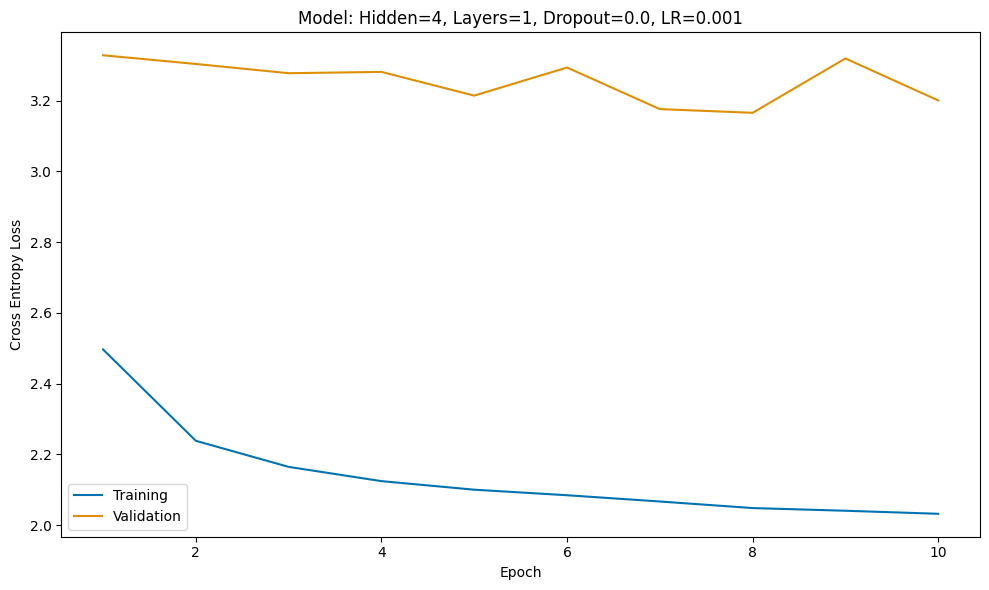

In [ ]:
from train_repetition import train_repetition

params = {
    'n_epochs': 20,
    'h_size': 8,
    'n_layers': 1,
    'dropout': 0.0,
    'l_rate': 0.005,
}
train_repetition(P, params)

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 2000)
from test_repetition import test_repetition

# model = "e30_h2_l2_d0.2_r0.005"
# model = "e30_h4_l1_d0.2_r0.01"
# model = "e30_h4_l1_d0.0_r0.001"
model = "e30_h8_l1_d0.0_r0.001"
dfs = test_repetition(P, model)

In [ ]:
dfs[1]